# 문장(시계열수치)입력 이진분류 모델
- 문장 혹은 시계열수치로 양성/음성을 분류하거나 이벤트 발생 유무를 감지하는 문제 해결에 사용

### 데이터셋 준비
- IMDB에서 제공하는 영화 리뷰 데이터셋
- 훈련셋 25,000개, 시험셋 25,000개의 샘플
- 라벨은 1과 0으로 좋아요/싫어요로 지정

In [1]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step


In [2]:
x_train.shape

(25000,)

In [3]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [4]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

In [5]:
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

## 1. 다층퍼셉트론 신경망 모델

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

### 모델 처리

In [10]:
model1 = Sequential()
model1.add(Embedding(20000, 128, input_length=200))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6553856   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 9,114,113
Trainable params: 9,114,113
Non-trainable params: 0
_________________________________________________________________


In [11]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
hist1 = model1.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

W0910 16:20:56.857782  9384 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 16s 811us/step - loss: 0.4213 - acc: 0.7896 - val_loss: 0.3003 - val_acc: 0.8730
Epoch 2/2
20000/20000 [==============================] - 14s 689us/step - loss: 0.0518 - acc: 0.9832 - val_loss: 0.5679 - val_acc: 0.8128


### 학습과정 살펴보기

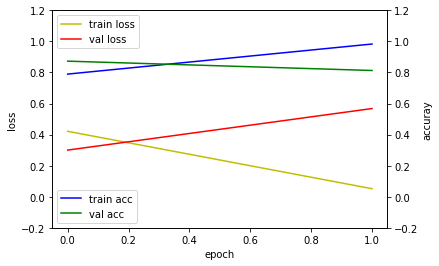

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist1.history['loss'], 'y', label='train loss')
loss_ax.plot(hist1.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist1.history['acc'], 'b', label='train acc')
acc_ax.plot(hist1.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [15]:
loss_and_metrics = model1.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 1s 54us/step
## evaluation loss and_metrics ##
[0.5835980905628204, 0.808640000038147]


## 2. 순환 신경망 모델

In [17]:
from keras.layers import LSTM

model2 = Sequential()
model2.add(Embedding(20000, 128))
model2.add(LSTM(128))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
hist2 = model2.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 109s 5ms/step - loss: 0.4395 - acc: 0.7918 - val_loss: 0.4294 - val_acc: 0.7992
Epoch 2/2
20000/20000 [==============================] - 214s 11ms/step - loss: 0.2385 - acc: 0.9103 - val_loss: 0.3530 - val_acc: 0.8630


### 학습과정 살펴보기

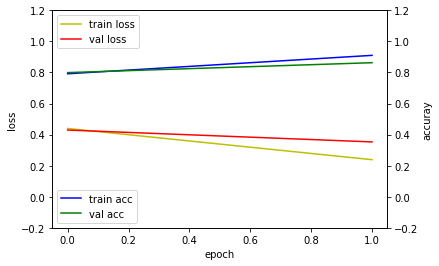

In [20]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist2.history['acc'], 'b', label='train acc')
acc_ax.plot(hist2.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [21]:
loss_and_metrics = model2.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 25s 983us/step
## evaluation loss and_metrics ##
[0.35368807143211367, 0.858759999961853]


## 3. 컨볼루션 신경망 모델
- 문장 해석에 컨볼루션(Conv1D) 레이어를 이용한 모델 
- 컨볼루션(Conv1D) 레이어는 위치에 상관없이 지역적인 특징을 잘 뽑아냄 
- 이 레이어를 문장에 적용한다면 주요 단어가 문장 앞 혹은 문장 뒤에 있더라도 놓치지 않고 전후 문맥을 보면서 특징을 잘 뽑아낼 수 있음
- 글로벌 맥스풀링(GlobalMaxPooling1D) 레이어는 컨볼루션 레이어가 문장을 훑어가면서 나온 특징벡터들 중 가장 큰 벡터를 골라줌 
- 즉 문맥을 보면서 주요 특징을 뽑아내고, 그 중 가장 두드러지는 특징을 고르는 것

In [25]:
max_features = 20000
text_max_words = 200

In [26]:
from keras.layers import Conv1D, GlobalMaxPooling1D, Dropout

model3 = Sequential()
model3.add(Embedding(max_features, 128, input_length=text_max_words))
model3.add(Dropout(0.2))
model3.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [28]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
hist3 = model3.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 13s 660us/step - loss: 0.4549 - acc: 0.7647 - val_loss: 0.3067 - val_acc: 0.8712
Epoch 2/2
20000/20000 [==============================] - 12s 585us/step - loss: 0.2196 - acc: 0.9128 - val_loss: 0.2703 - val_acc: 0.8910


### 학습과정 살펴보기

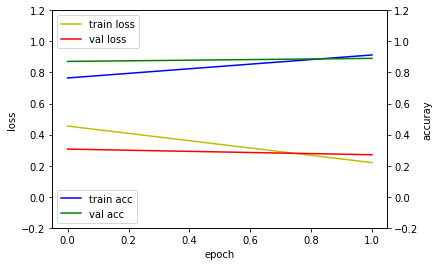

In [30]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist3.history['loss'], 'y', label='train loss')
loss_ax.plot(hist3.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist3.history['acc'], 'b', label='train acc')
acc_ax.plot(hist3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [31]:
loss_and_metrics = model3.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 3s 105us/step
## evaluation loss and_metrics ##
[0.2707339554977417, 0.8845200000190735]


## 4. 순환 컨볼루션 신경망 모델
- 컨볼루션 레이어에서 나온 특징벡터들을 맥스풀링(MaxPooling1D)를 통해 1/4로 줄여준 다음 LSTM의 입력으로 넣어주는 모델
- 이때 맥스풀링은 특징벡터 크기를 줄여주는 것이 아니라 특징벡터 수를 줄여줌
- 즉 200개 단어가 컨볼루션 레이어를 통과하면 256 크기를 갖는 특징벡터가 198개가 생성되고, 맥스풀링은 특징벡터 198개 중 49개를 골라줌
- 따라서 LSTM 레이어의 timesteps는 49개가 됨. 참고로 input_dim은 그대로 256임

In [33]:
from keras.layers import MaxPooling1D

model4 = Sequential()
model4.add(Embedding(max_features, 128, input_length=text_max_words))
model4.add(Dropout(0.2))
model4.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(128))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

W0910 16:54:27.480333  9384 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 2,855,809
Trainable params: 2,855,809
Non-trainable params: 0
___________________________________________

In [34]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
hist4 = model4.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 47s 2ms/step - loss: 0.3981 - acc: 0.8086 - val_loss: 0.2973 - val_acc: 0.8758
Epoch 2/2
20000/20000 [==============================] - 77s 4ms/step - loss: 0.1834 - acc: 0.9330 - val_loss: 0.3435 - val_acc: 0.8756


### 학습과정 살펴보기

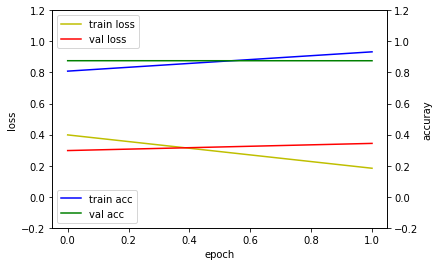

In [36]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist4.history['loss'], 'y', label='train loss')
loss_ax.plot(hist4.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist4.history['acc'], 'b', label='train acc')
acc_ax.plot(hist4.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [37]:
loss_and_metrics = model4.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 20s 788us/step
## evaluation loss and_metrics ##
[0.3687972937488556, 0.8640400000190734]
